# ESMAC: Generate diurnal cycle of size distribution

---


Setup dependencies:

In [1]:

import os
import numpy as np
import xarray as xr
import pandas as pd
# these sys settings are just for the jupyterhub demo
import sys 
sys.path.append('/home/'+os.environ['USER']+'/.local/lib/python3.9/site-packages')
import esmac_diags.plotting.plot_esmac_diags as plot


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-ls8eoh3q because the default path (/home/jovyan/.cache/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


<br> Configure settings:

In [2]:
# set site name.
site = 'HISCALE'

# path of prepared files
prep_model_path = '../prep_data/'+site+'/model/'
prep_obs_path = '../prep_data/'+site+'/surface/'
# set output path for plots
figpath= '../figures/'+site+'/surface/'


<br>Read in data:

In [3]:
# trim for the same time period
IOP = 'IOP1'
time1 = np.datetime64('2016-04-25')
time2 = np.datetime64('2016-05-22')
time = pd.date_range(start='2016-04-25', end='2016-05-22', freq="H")
# IOP = 'IOP2'
# time1 = np.datetime64('2016-08-28')
# time2 = np.datetime64('2016-09-23')
# time = pd.date_range(start='2016-08-28', end='2016-09-23', freq="H")

filename = prep_obs_path + 'sfc_SMPS_'+site+'_'+IOP+'.nc'
obsdata = xr.open_dataset(filename)
time_smps = obsdata['time'].load()
smpsall = obsdata['dN_dlogDp'].load()
size_smps = obsdata['size'].load()
obsdata.close()

filename = prep_model_path + 'E3SMv2_'+site+'_sfc.nc'
modeldata = xr.open_dataset(filename)
time_m2 = modeldata['time'].load()
ncn_e3sm2 = modeldata['NCNall'].load()
modeldata.close()

ncn_e3sm2 = ncn_e3sm2[:, np.logical_and(time_m2>=time1, time_m2<=time2)]
smpsall = smpsall[np.logical_and(time_smps>=time1, time_smps<=time2),:]


<br>Specific data treatment:

In [4]:
# convert to dN/dlog10Dp
# SMPS is already dlogDp
dlogDp_e3sm = np.log10(np.arange(2,3002)/np.arange(1,3001))
ncn_e3sm2 = ncn_e3sm2.T/dlogDp_e3sm
    

<br> Generate plot:

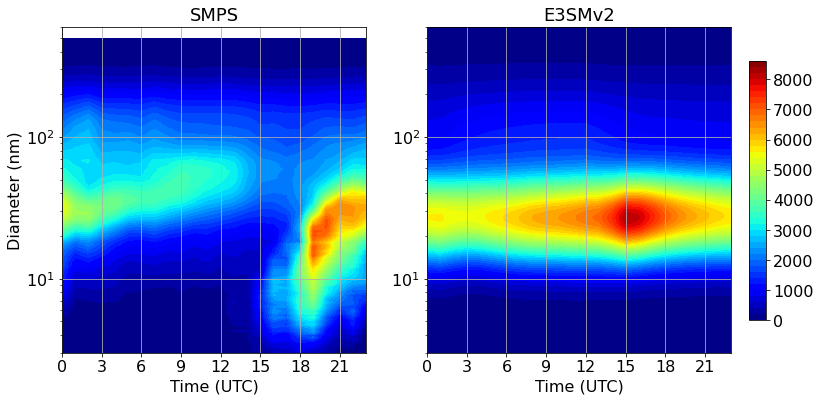

In [5]:
#%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
# plot 
if not os.path.exists(figpath):
    os.makedirs(figpath)

fig,ax = plot.diurnalcycle_2d([smpsall.T, ncn_e3sm2.T], levellist=np.arange(0,8800,200),
                        y=[size_smps, np.arange(1,3001)], xlabel='Time (UTC)', ylabel='Diameter (nm)', 
                        ylimit=(3,600),cmap='jet',title= ['SMPS','E3SMv2',])
ax[0].set_yscale('log')
ax[1].set_yscale('log')
#fig.savefig(figpath+'diurnalcycle_AerosolSize_'+site+'_'+IOP+'.png',dpi=fig.dpi,bbox_inches='tight', pad_inches=1)

# show figures in interactive commandline screen
import matplotlib.pyplot as plt
plt.show() 